# Task 1 Prediction using Supervised ML


## By: Amit Nevarekar

## The Sparks Foundation

## Data Science and Analytics Intern

## Importing Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Dataset

In [74]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
print("Data Imported Successfully..!!!")
print(df)

Data Imported Successfully..!!!
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [75]:
df.shape

(25, 2)

## Scatter Plot

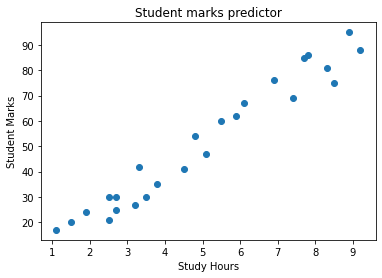

In [76]:
plt.scatter(x=df.Hours,y=df.Scores)
plt.xlabel('Study Hours')
plt.ylabel('Student Marks')
plt.title('Student marks predictor')
plt.show()

In [77]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Splitting data in Dependent and Independent Variables

In [78]:
x=df.iloc[:, :-1].values #independent variable
y=df.iloc[:, 1].values #dependent variable

In [79]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


## Train-Test Splitting

In [80]:
#train test splitting
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x, y, test_size=0.2,random_state=0)

## Linear Regression 

In [81]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

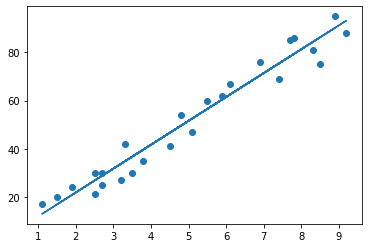

In [82]:
line=lr.coef_*x+lr.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## Predictions


In [83]:
print(X_test) #testing data in hours
y_pred=lr.predict(X_test) #predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [84]:
#comparing actual vs predicted
df1=pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
print(df1)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


## Model Evaluation

###### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [85]:
print("Coefficients: ",lr.coef_)
print("Intercept: ",lr.intercept_)

Coefficients:  [9.91065648]
Intercept:  2.0181600414346974


In [86]:
from sklearn import metrics
print('Mean absolute error: ',metrics.mean_absolute_error(Y_test, y_pred))

Mean absolute error:  4.183859899002975


In [87]:
#Explained variance score: 1 is perfect prediction 
from sklearn.metrics import r2_score
print('Variance score: %.2f'% r2_score(Y_test, y_pred))

Variance score: 0.95


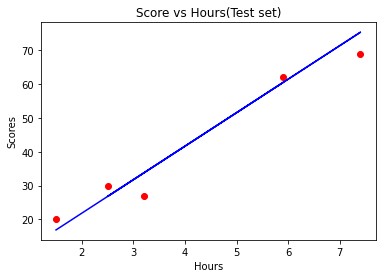

In [88]:
#Plotting the graph for test dataset
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Score vs Hours(Test set)')
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.show()

In [90]:
hours=np.array(9.25).reshape((-1, 1))
own_pred=lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted score = 93.69173248737535


## Conclusion 


##### If a student studies for 9.25 hrs/day, according to model predicted score is 93.69